# Telemarketing Banco Portugues

- [ISCTE Repositorio](https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf)
- [SDUM Repo](http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf)
- [Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- [Towards Data](https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c)

## Importacao das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Leitura de dados

In [3]:
original_dados_banco = pd.read_csv('bank-full.csv', delimiter = ';')
print(original_dados_banco.shape)
original_dados_banco

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Copia de dados

In [4]:
df = original_dados_banco.copy()

### Estrutura de dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Rapida analise Estatistica de dados (numericos)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [8]:
df.month.describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

Text(0.5, 0, 'Count')

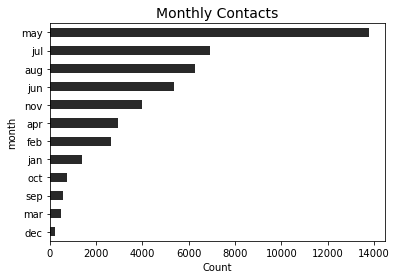

In [9]:
df.groupby(['month'])['month'].count().sort_values().plot(kind='barh', color = '#292929')
plt.title('Monthly Contacts', fontsize =  14)
plt.xlabel('Count')

#### Rapida analise Estatistica de dados (textos - categorias)

In [10]:
df.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## EDA ou ED (Exploracao de dados)

In [11]:
var_numerica = df.select_dtypes(['int64']).columns.values
var_categorical = df.select_dtypes(['object']).columns.values

In [12]:
for col in var_numerica:
    if df[col].nunique() <= 50:
        print(col, '\n', df[col].unique(), '\n\n')

day 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 


campaign 
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44] 


previous 
 [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41] 




In [13]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

### Valores nulos

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Analise univariavel
__Age__

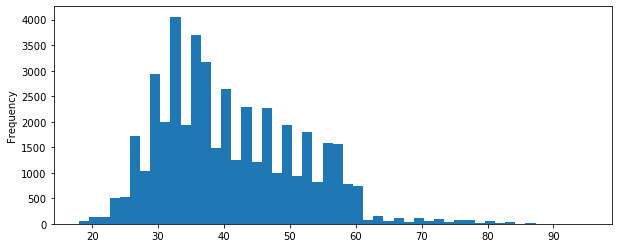

In [16]:
df.age.plot(figsize = (10, 4), kind = 'hist', bins =50)

Text(0.5, 1.0, "['Age Distribution']")

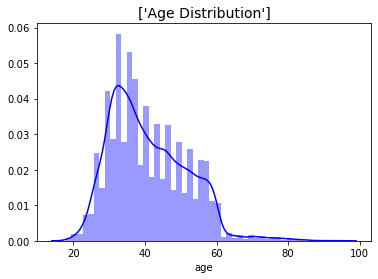

In [17]:
sns.distplot(df.age, hist=True, color='blue')
plt.title(['Age Distribution'], fontsize = 14)

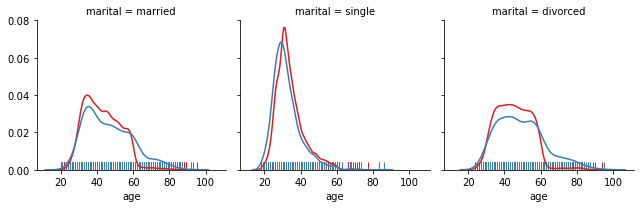

In [18]:
g = sns.FacetGrid(df, col='marital', hue="y", palette="Set1")
g = (g.map(sns.distplot, "age", hist=False, rug=True))

### Dados numericos

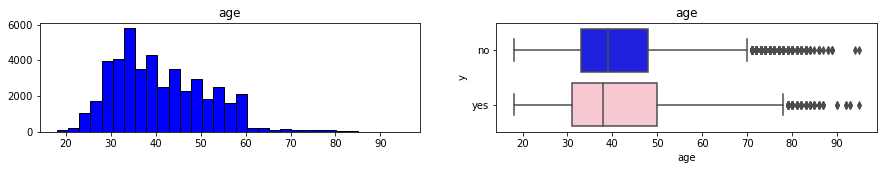

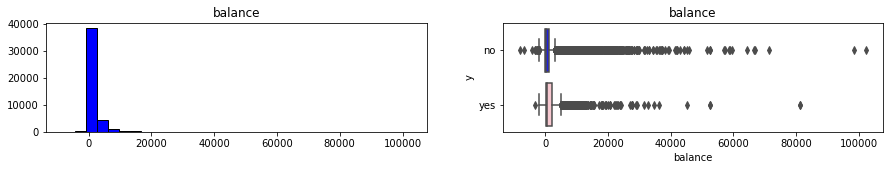

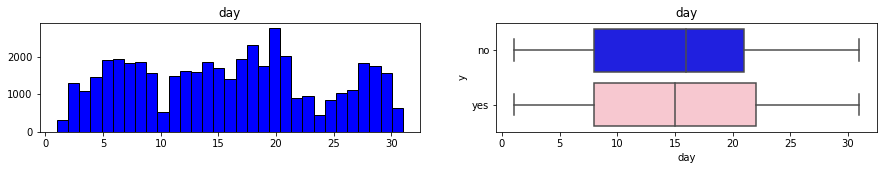

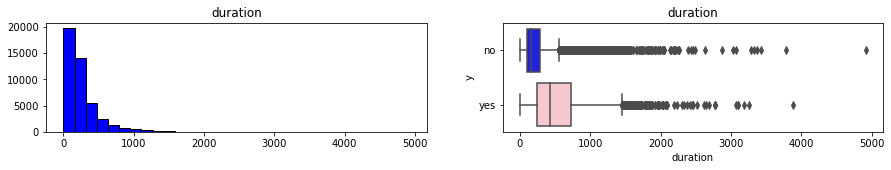

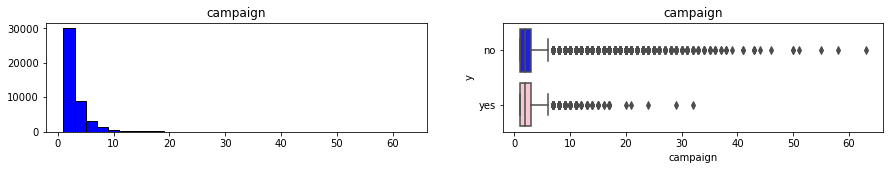

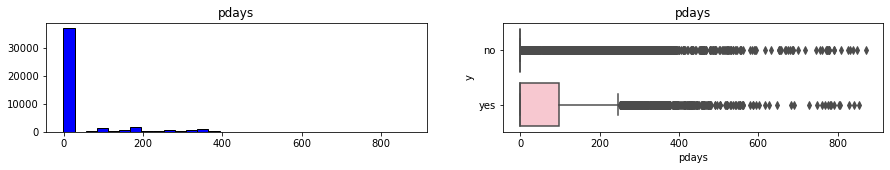

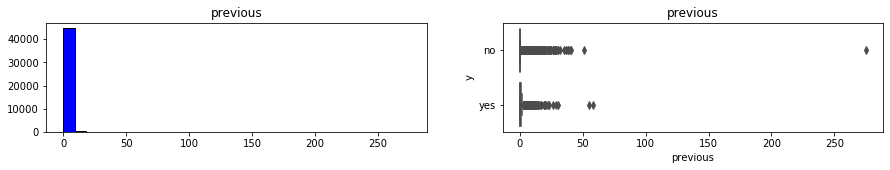

In [19]:
for col in var_numerica:
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color = 'blue')
    axs[0].set_title(col)
    
    sns.boxplot(data=df, x= col, y='y', ax=axs[1], palette = ['blue', 'pink'])
    axs[1].set_title(col)
    #axs[1].set_legend()

#### Dados categoricos (textos)

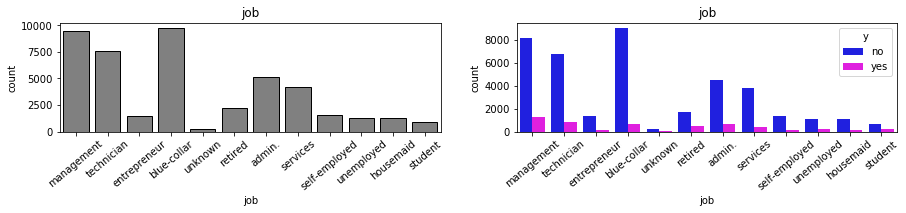

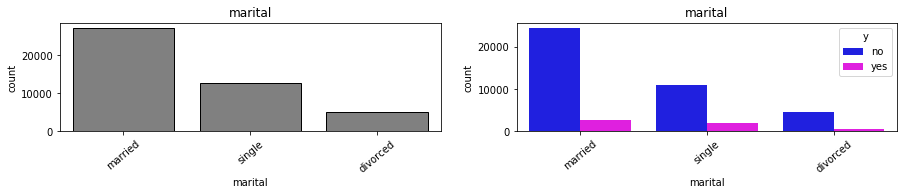

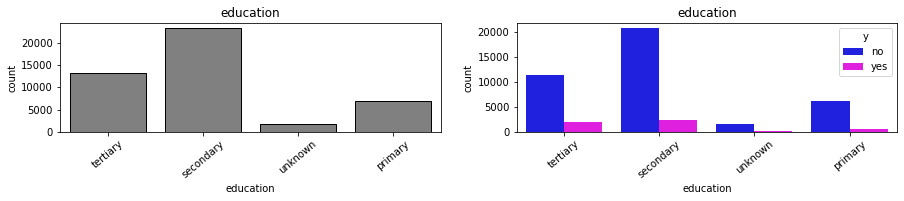

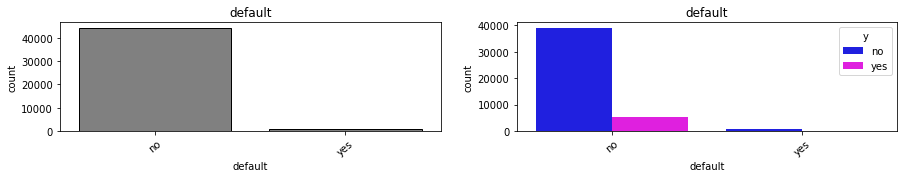

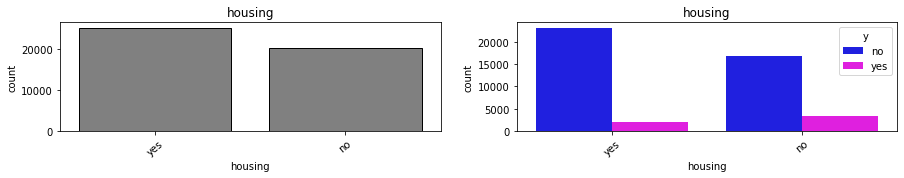

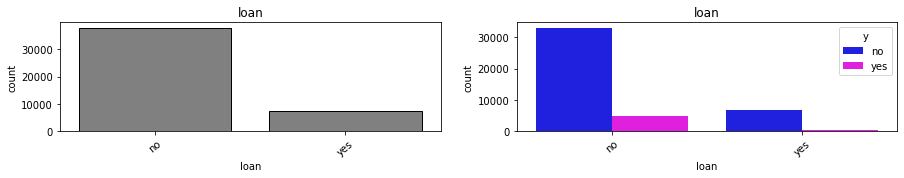

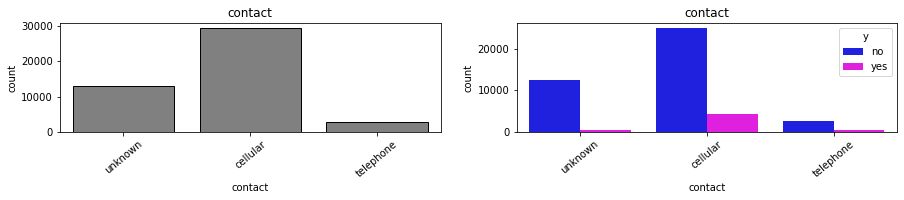

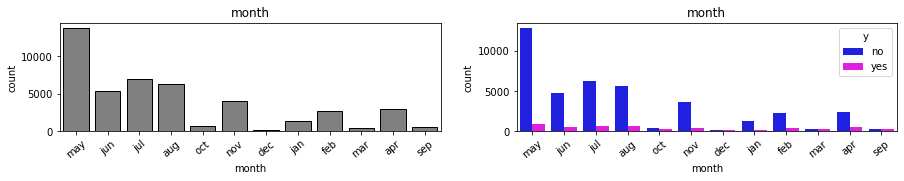

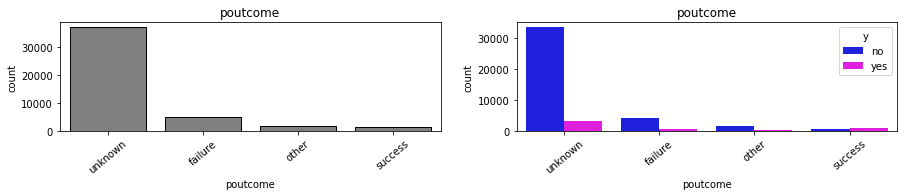

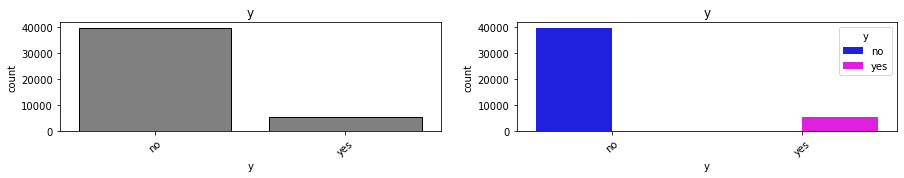

In [20]:
for col in var_categorical:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], edgecolor = 'black', color = 'grey')
    axs[0].set_title(col)
    axs[0].set_xticklabels(labels = df[col].unique(), rotation=40)
    
    sns.countplot(data=df, x= col, hue='y', ax=axs[1], palette = ['blue', 'magenta'])
    axs[1].set_title(col)
    axs[1].set_xticklabels(labels = df[col].unique(), rotation=40)
    
    #axs[1].set_legend()

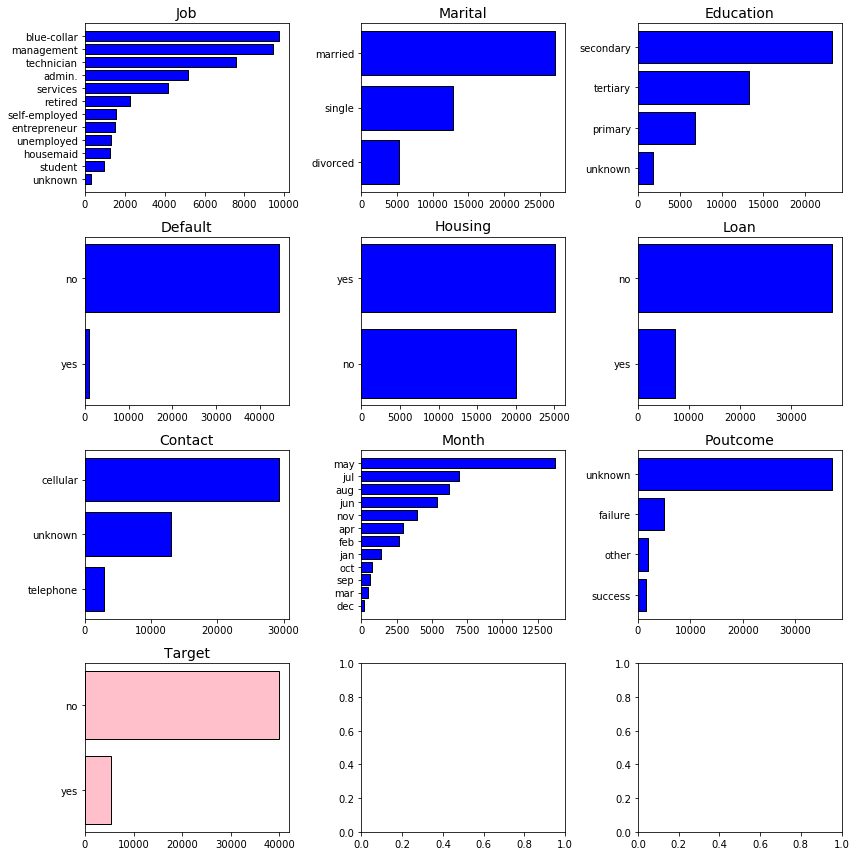

In [21]:
ncol = 3
nrow = int(np.ceil(len(var_categorical) / ncol))


fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 12))

for (ax, feat) in zip(axs.reshape(-1), var_categorical):
    values = df.groupby(feat)[feat].count().sort_values(ascending=True)
    
    color = '#011321'
    color = 'blue'
    if feat in ['y']:
        color = 'pink'
        feat  = 'Target'
    ax.barh(values.index, values, color=color, edgecolor = 'black')
    ax.set_title(feat.title(), fontsize=14)
    
plt.tight_layout()

# Precessamento de variaveis
### Transformacao de variavel - texto para numerica

In [26]:
variavel_texto = df.select_dtypes('object')

In [ ]:
pd.get_dummiesd(df[var])

## Analise bivariavel
Visto que a nossa variavel `objectivo` e categorica, entao vamos recorrer a corelacao entre variaveis para detectar e compreender aquelas melhor r=corelaciona.

In [23]:
df['target'] = df.y.map({'no':0, 'yes':1})

In [27]:
df.corr()[['target']].sort_values(by=['target'])

,target
campaign,-0.073172
day,-0.028348
age,0.025155
balance,0.052838
previous,0.093236
pdays,0.103621
duration,0.394521
target,1.000000


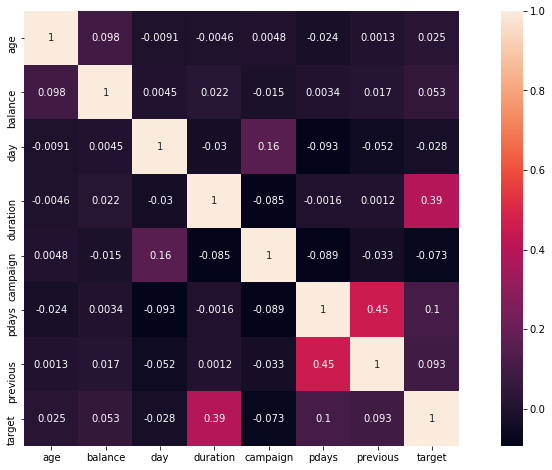

In [242]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), square=True, annot=True)

In [245]:
for col in var_categorical:
    print(col, '\n',df[col].unique(), '\n\n')

job 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 


marital 
 ['married' 'single' 'divorced'] 


education 
 ['tertiary' 'secondary' 'unknown' 'primary'] 


default 
 ['no' 'yes'] 


housing 
 ['yes' 'no'] 


loan 
 ['no' 'yes'] 


contact 
 ['unknown' 'cellular' 'telephone'] 


month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 


poutcome 
 ['unknown' 'failure' 'other' 'success'] 


y 
 ['no' 'yes'] 




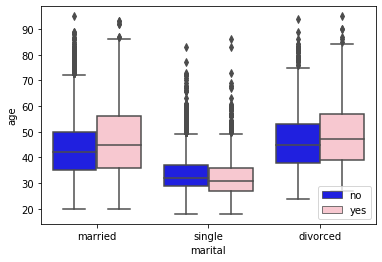

In [235]:
sns.boxplot(data=df, x = 'marital', y = 'age', hue = 'y', palette = ['blue', 'pink'])
plt.legend(loc = 4)

Text(0.5, 1.0, 'Age')

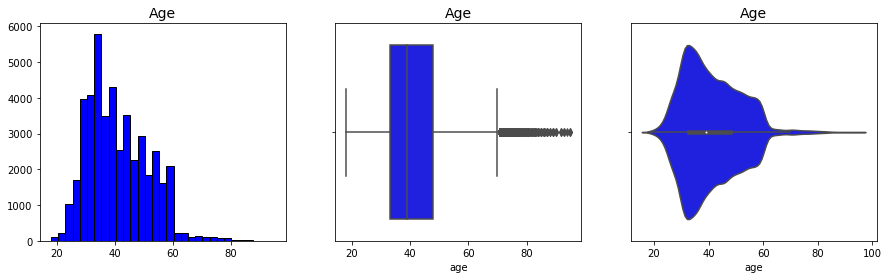

In [229]:
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (15,4))
    axs = axs.reshape(-1)
    col = 'age'
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color='blue')
    axs[0].set_title(col.title(), fontsize = 14)
    
    sns.boxplot(data=df, x= col, ax=axs[1], color='blue')
    axs[1].set_title(col.title(), fontsize = 14)
    
    sns.violinplot(df[col], color='blue')
    axs[2].set_title(col.title(), fontsize = 14)

Text(0.5, 1.0, 'Balance according to Age Group')

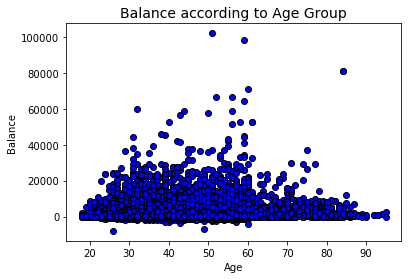

In [184]:
plt.scatter(df['age'], df['balance'], edgecolor = 'black', color='blue')
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Balance according to Age Group', fontsize = 14)

In [213]:
var_categorical

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

Text(0.5, 1.0, 'Age vs Marital Status')

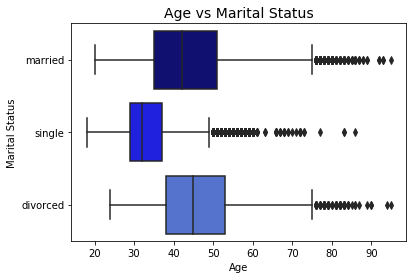

In [216]:
sns.boxplot(data=df, x='age', y='marital', palette=['navy','blue', 'royalblue'])
plt.ylabel('Marital Status')
plt.xlabel('Age')
plt.title('Age vs Marital Status', fontsize = 14)

Text(0.5, 1.0, 'Balance according to Age Group')

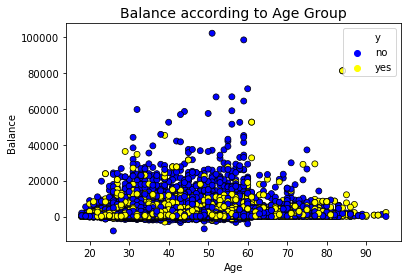

In [181]:
sns.scatterplot(data=df, x='age', y='balance', hue='y', palette=['blue', 'yellow'], edgecolor='black')
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Balance according to Age Group', fontsize = 14)

In [ ]:
sns.box

Text(0.5, 1.0, 'Balance of client contacted per Month')

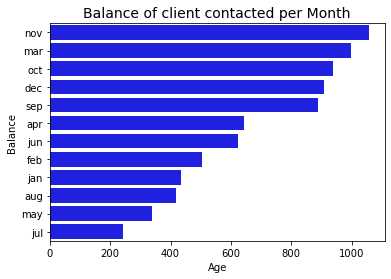

In [212]:
monthly_mean_balance = df.groupby(['month'])[['balance']].median()['balance'].sort_values(ascending=False)
sns.barplot(y=monthly_mean_balance.index, x=monthly_mean_balance.values, color = 'blue')
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Balance of client contacted per Month', fontsize = 14)

In [ ]:
afro = 